# GPs in Julia
Script, without much function definitions, as in the book. Here is the first implementation in the most straight-forward way possible.

In [1]:
using LinearAlgebra
using Plots

GP definition:
- Mean function
- Kernel function and parameters
- Noise level

In [2]:
μ(x) = 0
σ_n = 0.25
#σ_n = 0
σ_f = 1
l = 1
k(x₁, x₂) = σ_f.^2 * exp.(-(x₁.-x₂').^2 ./ l.^2)
# k(x₁, x₂) = (x₁ .== x₂')  # White noise
# k(x₁, x₂) = min.(x₁, x₂')  # Wiener process

k (generic function with 1 method)

## Prior Distribution

In [3]:
x_test = [x for x in 0:0.01:10]

mean = μ.(x_test)
cov = k(x_test, x_test);

In [4]:
# Sample
cov_chol = cholesky(Symmetric(cov) + 1e-6*I)
samples = mean .+ cov_chol.L * randn(length(mean), 5);

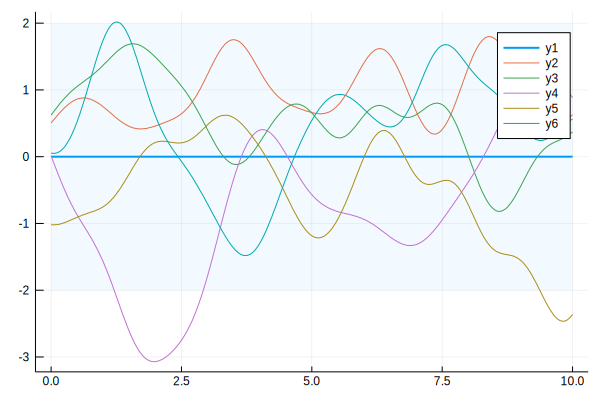

In [5]:
plot(x_test, mean, width=2, ribbon=2sqrt.(diag(cov)), fillalpha=0.05)
plot!(x_test, samples)

## Posterior Distribution

In [6]:
# Generate Data from some GP
n = 50
X = rand(n) * last(x_test)
mean, cov = μ.(X), k(X, X)
cov_chol = cholesky(Symmetric(cov) + 1e-6*I)
f = mean .+ cov_chol.L * randn(length(mean))
y = f + randn(size(f)) * σ_n;

In [7]:
K = k(X, X)
K_s = k(X, x_test)
K_ss = k(x_test, x_test)
K_inv = inv(K + σ_n^2 * I + 1e-6I)

cov = K_ss - K_s' * K_inv * K_s
mean = K_s' * K_inv * y;

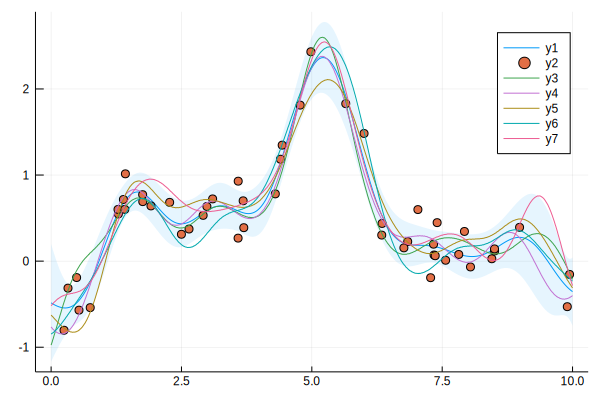

In [8]:
plot(x_test, mean, ribbon=2sqrt.(diag(cov)), fillalpha=0.1)
scatter!(X, y)

cov_chol = cholesky(Symmetric(cov) + 1e-6*I)
samples = mean .+ cov_chol.L * randn(length(mean), 5)
plot!(x_test, samples)